In [63]:
# Prepare the data to be ready to use for later in classification 
# We want to predict wheter a loan will be a "Good Loan" or "Bad Loans", before giving the loan

In [64]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
# Import Data
loan = pd.read_csv('../data/lending-club-loan-data/loan.csv', low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# Start by exploring the data
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [67]:
loan['issue_d'].head()

0    Dec-2011
1    Dec-2011
2    Dec-2011
3    Dec-2011
4    Dec-2011
Name: issue_d, dtype: object

In [68]:
# Transform "issue_d" to year --> year the loan was issue
dt_series = pd.to_datetime(loan['issue_d'])
# Convert Date Time to Year from series
loan['year'] = dt_series.dt.year
loan['year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

In [69]:
# Remove records that have "loan_status" = "Current" --> we can't learn from these loans yet!
loan = loan[loan['loan_status']!='Current']
loan['loan_status'].value_counts()

Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [70]:
# Group the remaining "loan_status" into "Good" or "Bad"
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]

def loan_condition(status):
    if status in bad_loan:
        return 'Bad'
    else:
        return 'Good'
    
def loan_condition_num(status):
    if status in bad_loan:
        return 1
    else:
        return 0
    
loan['loan_condition'] = loan['loan_status'].apply(loan_condition)

loan['loan_condition_num'] = loan['loan_status'].apply(loan_condition_num)

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,year,loan_condition,loan_condition_num
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,Good,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,Bad,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,Good,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,Good,0
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,Good,0


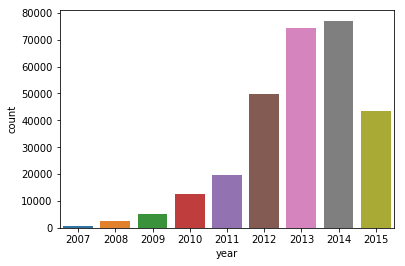

In [71]:
# Explore the Data
# Check relationship and plot graphs
# # of Loans issued / year

# plt.figure(figsize=(12,8))
# sns.barplot('year', 'loan_amnt', data=loan, palette='tab10', ci=None)
# plt.title('Issuance of Loans', fontsize=16)
# plt.xlabel('Year', fontsize=14)
# plt.ylabel('# loan amount issued', fontsize=14)

sns.countplot(x="year", data=loan);

Text(0,0.5,'Average loan amount issued')

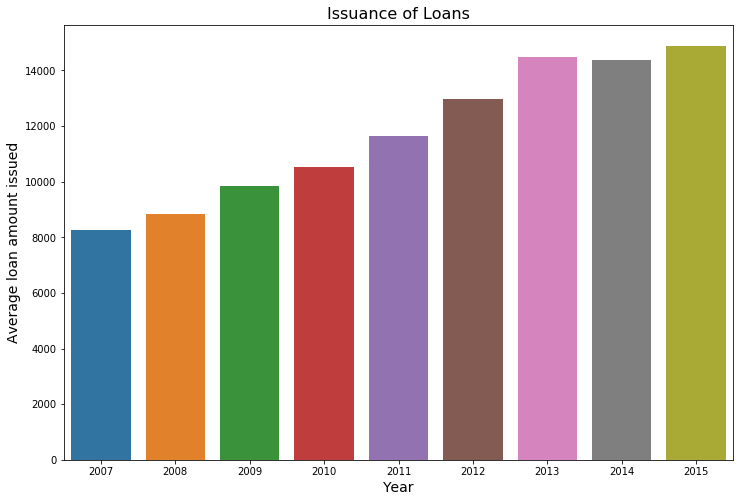

In [72]:
# Explore the Data
# Check relationship and plot graphs
# # of Loans issued / year

plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amnt', data=loan, palette='tab10', ci=None)
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

# Good/Bad by Year
# 

In [73]:
# Cut down the data to a manageable amount
loan = loan[loan['year']<=2011]
loan['year'].value_counts()

2011    19768
2010    12530
2009     5281
2008     2393
2007      603
Name: year, dtype: int64

[Text(0,0.5,'(% of Bad Loans)')]

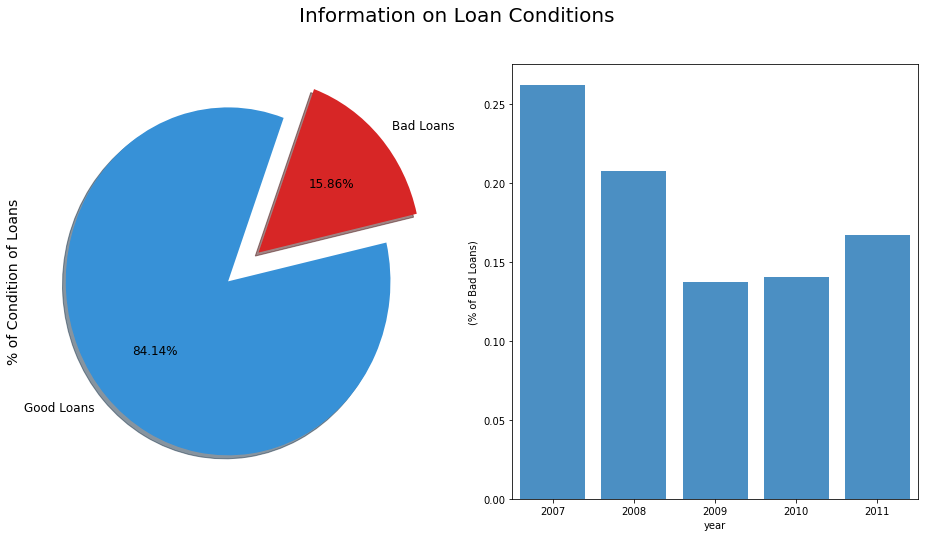

In [74]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

loan["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)


palette = ["#3791D7"]
sns.barplot(x="year", y="loan_condition_num", data=loan, palette=palette, estimator=lambda x: sum(x)/len(x), ci = None)
ax[1].set(ylabel="(% of Bad Loans)")

[Text(0,0.5,'(% of Bad Loans)')]

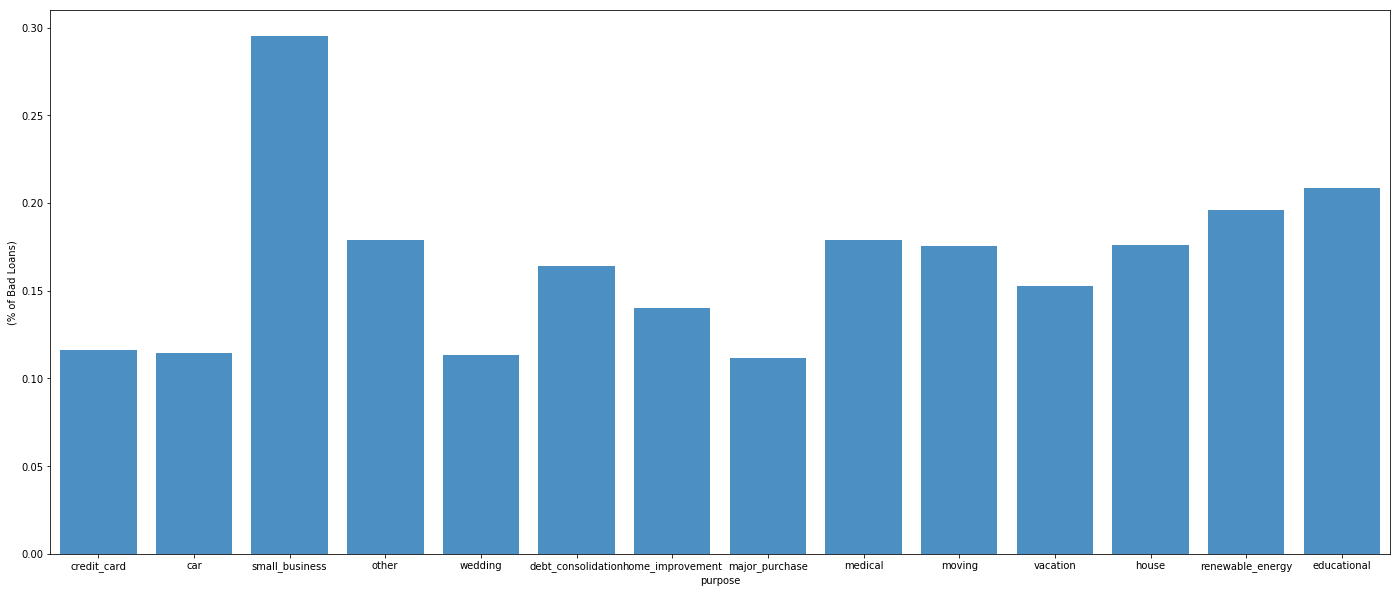

In [75]:
graph_dims = (24,10)
fig, ax = plt.subplots(figsize=graph_dims)

palette = ["#3791D7"]
sns.barplot(x="purpose", y="loan_condition_num", data=loan, palette=palette, estimator=lambda x: sum(x)/len(x), ci = None)
ax.set(ylabel="(% of Bad Loans)")

[Text(0,0.5,'(% of Bad Loans)')]

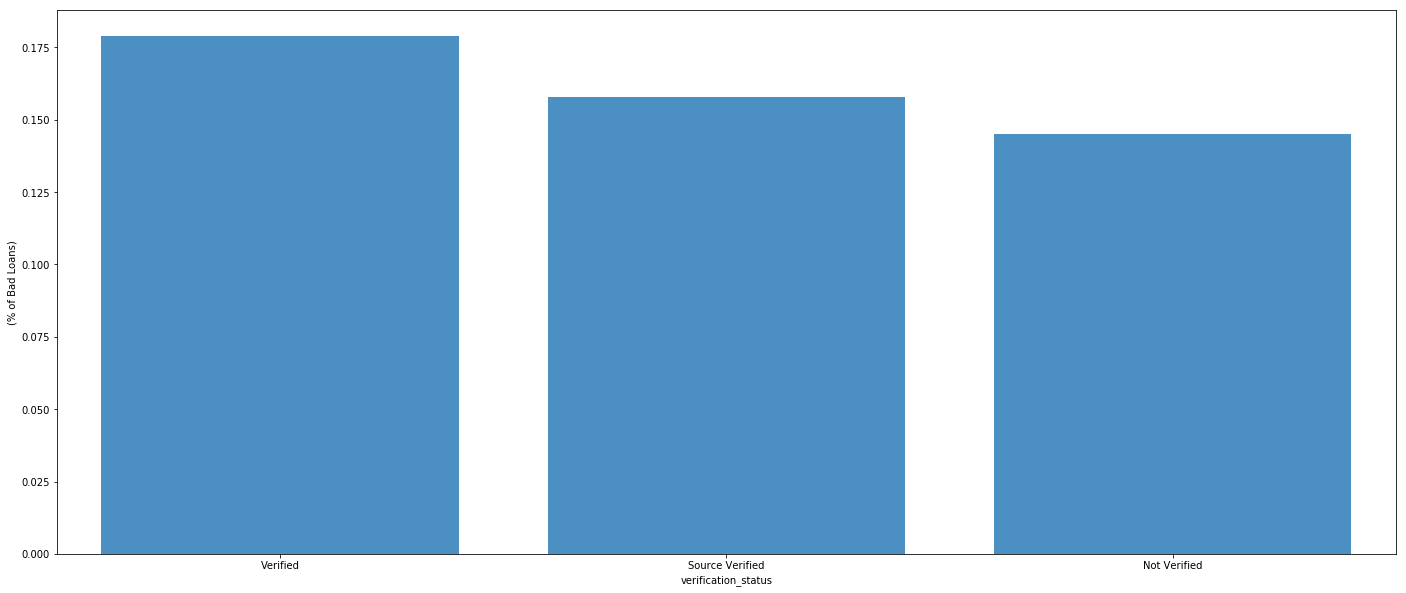

In [76]:
graph_dims = (24,10)
fig, ax = plt.subplots(figsize=graph_dims)

palette = ["#3791D7"]
sns.barplot(x="verification_status", y="loan_condition_num", data=loan, palette=palette, estimator=lambda x: sum(x)/len(x), ci = None)
ax.set(ylabel="(% of Bad Loans)")

[Text(0,0.5,'(% of Bad Loans)')]

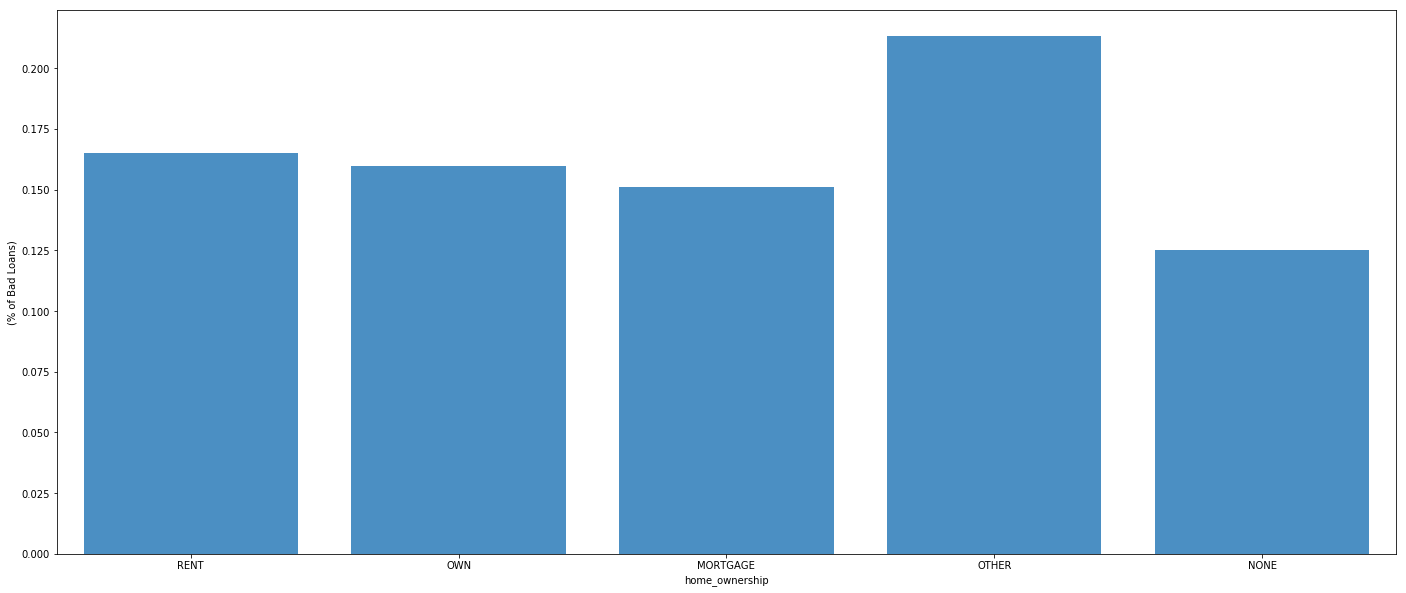

In [77]:
graph_dims = (24,10)
fig, ax = plt.subplots(figsize=graph_dims)

palette = ["#3791D7"]
sns.barplot(x="home_ownership", y="loan_condition_num", data=loan, palette=palette, estimator=lambda x: sum(x)/len(x), ci = None)
ax.set(ylabel="(% of Bad Loans)")

[Text(0,0.5,'(% of Bad Loans)')]

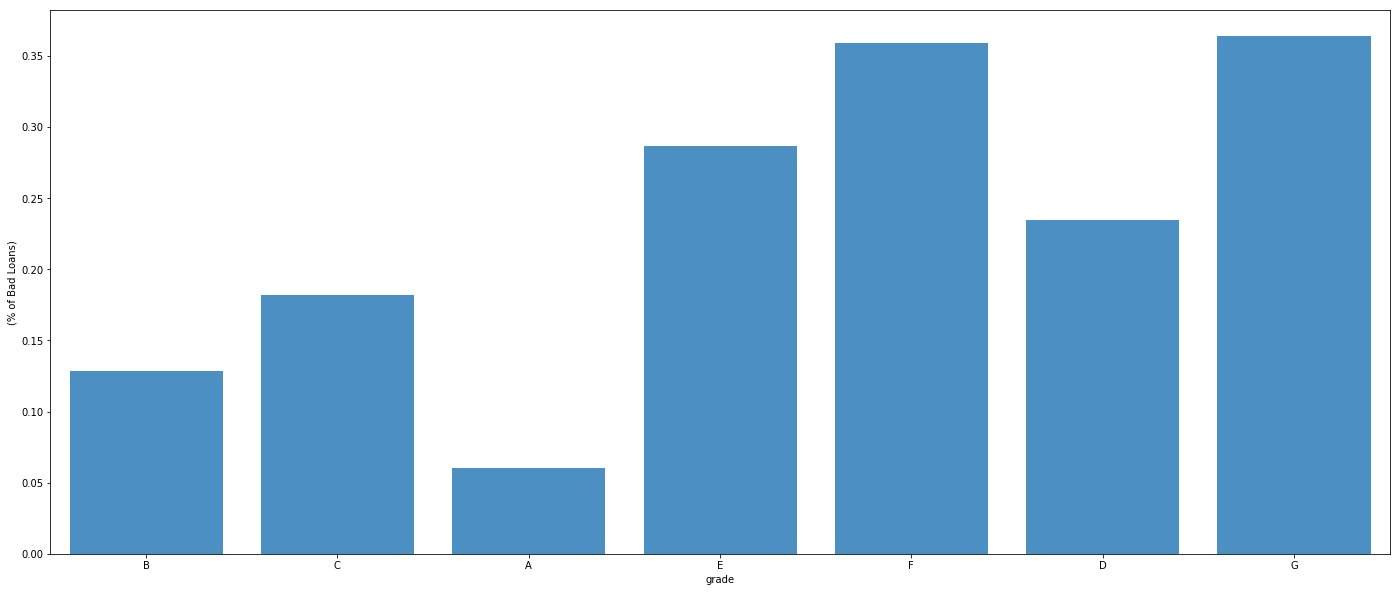

In [78]:
graph_dims = (24,10)
fig, ax = plt.subplots(figsize=graph_dims)

palette = ["#3791D7"]
sns.barplot(x="grade", y="loan_condition_num", data=loan, palette=palette, estimator=lambda x: sum(x)/len(x), ci = None)
ax.set(ylabel="(% of Bad Loans)")

[Text(0,0.5,'(% of Bad Loans)')]

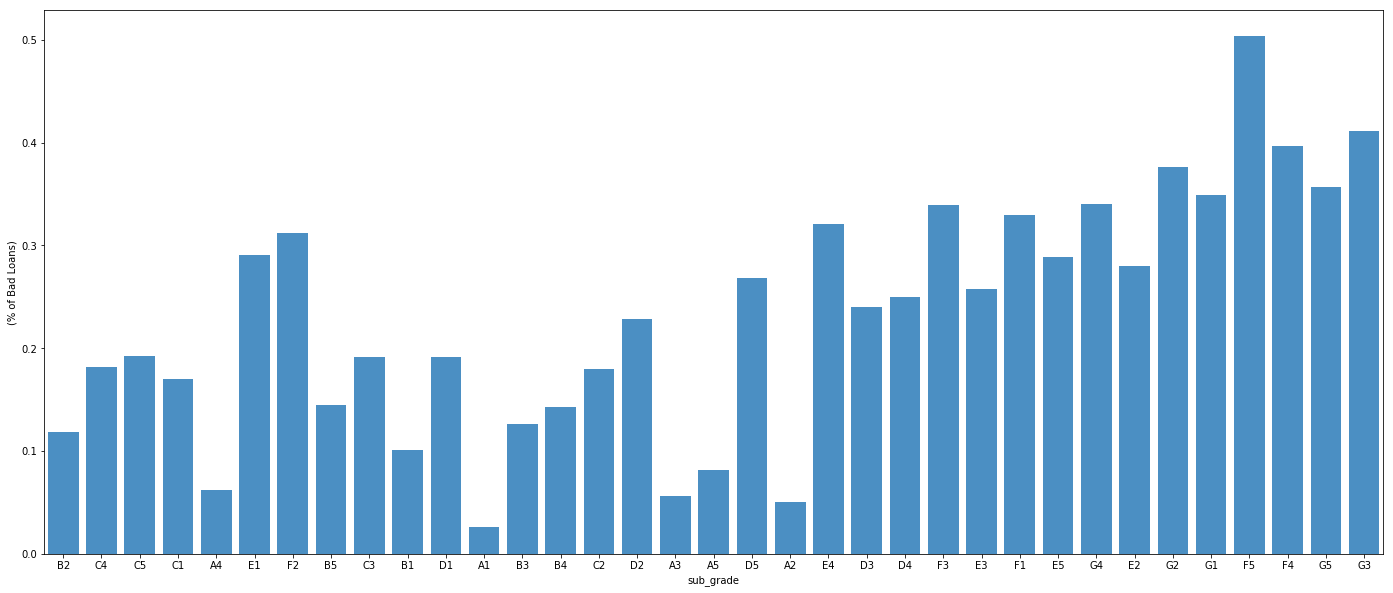

In [79]:
graph_dims = (24,10)
fig, ax = plt.subplots(figsize=graph_dims)

palette = ["#3791D7"]
sns.barplot(x="sub_grade", y="loan_condition_num", data=loan, palette=palette, estimator=lambda x: sum(x)/len(x), ci = None)
ax.set(ylabel="(% of Bad Loans)")

[Text(0,0.5,'(% of Bad Loans)')]

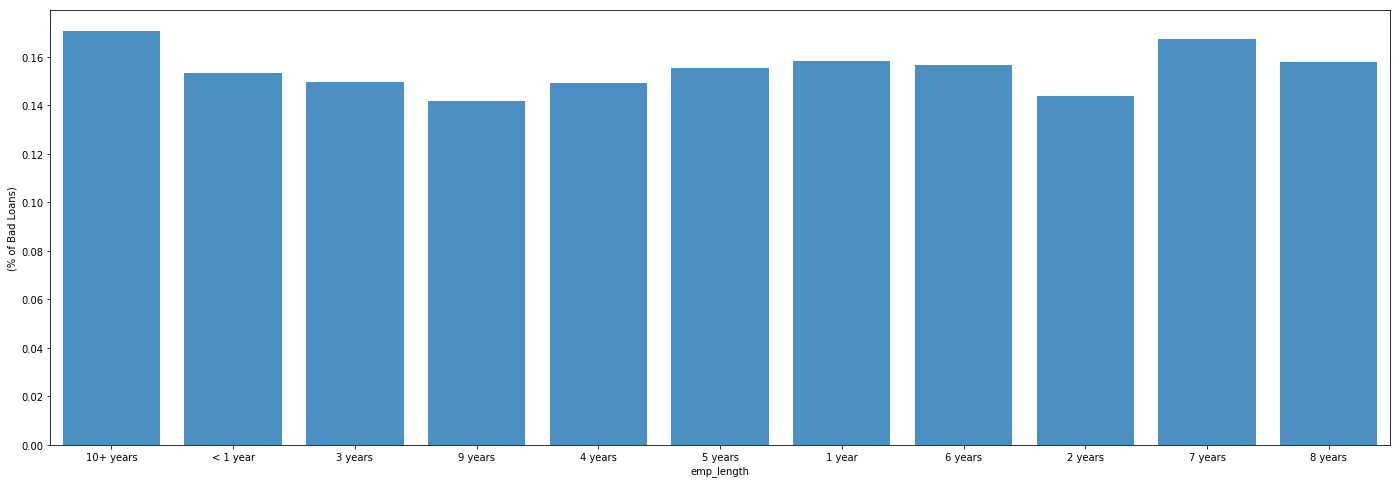

In [80]:
graph_dims = (24,8)
fig, ax = plt.subplots(figsize=graph_dims)

palette = ["#3791D7"]
sns.barplot(x="emp_length", y="loan_condition_num", data=loan, palette=palette, estimator=lambda x: sum(x)/len(x), ci = None)
ax.set(ylabel="(% of Bad Loans)")

In [81]:
# Remove columns that can not be known when we are trying to do the prediction
# Leave only columns that can be obtained when considering wheter to approve the loan or not
# Columns to remain
# purpose
# verification_status
# loan_amnt
# int_rate
# installment
# grade
# sub_grade
# emp_length
# home_ownership
# annual_inc
# dti, dti_joint
# inq_last_6mths
# mths_since_last_delinq
# open_acc
# total_acc
# pub_rec
# revol_util
# revol_bal
# addr_state
# term
# issue_d
# loan_condition --> this is what we are going to predict
feature_selected = ['purpose', 'verification_status', 'loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'total_acc', 'pub_rec', 'revol_util', 'revol_bal', 'addr_state', 'term', 'loan_condition', 'loan_condition_num']
loan = loan[feature_selected]
loan.head()

,purpose,verification_status,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,total_acc,pub_rec,revol_util,revol_bal,addr_state,term,loan_condition,loan_condition_num
0,credit_card,Verified,5000.0,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,1.0,3.0,9.0,0.0,83.7,13648.0,AZ,36 months,Good,0
1,car,Source Verified,2500.0,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,5.0,3.0,4.0,0.0,9.4,1687.0,GA,60 months,Bad,1
2,small_business,Not Verified,2400.0,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,2.0,2.0,10.0,0.0,98.5,2956.0,IL,36 months,Good,0
3,other,Source Verified,10000.0,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,1.0,10.0,37.0,0.0,21.0,5598.0,CA,36 months,Good,0
5,wedding,Source Verified,5000.0,7.90,156.46,A,A4,3 years,RENT,36000.0,...,3.0,9.0,12.0,0.0,28.3,7963.0,AZ,36 months,Good,0


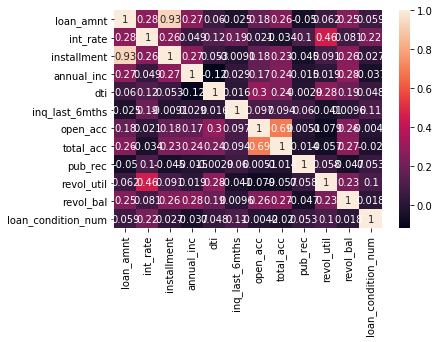

In [82]:
# Check correlations
# Be careful of any X variables that have high corelation with other Xs
sns.heatmap(loan.corr(), annot=True)

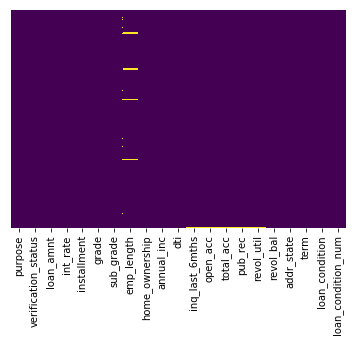

In [83]:
loan = loan
sns.heatmap(loan.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [84]:
# Check for any "holes" or values that might cause error in the models
# Infinite Values
# nulls
# NaN (Not a number in a number column)
# assign null to infinite values
loan.replace([np.inf, -np.inf], np.nan)

loan.isnull().any()

purpose                False
verification_status    False
loan_amnt              False
int_rate               False
installment            False
grade                  False
sub_grade              False
emp_length              True
home_ownership         False
annual_inc              True
dti                    False
inq_last_6mths          True
open_acc                True
total_acc               True
pub_rec                 True
revol_util              True
revol_bal              False
addr_state             False
term                   False
loan_condition         False
loan_condition_num     False
dtype: bool

In [85]:
# Fill in the "holes"
# Or remove the holes if the missing data is more than 20% of the data
# Fill in categorial data with the most occurring category
loan['emp_length'].value_counts()

def impute_emp_length(x):
    if pd.isnull(x):
        return '10+ years'
    else:
        return x
    
loan['emp_length'] = loan['emp_length'].apply(impute_emp_length)

# sns.heatmap(loan.isnull(), yticklabels=False, cbar=False, cmap='viridis')
loan.isnull().any()

purpose                False
verification_status    False
loan_amnt              False
int_rate               False
installment            False
grade                  False
sub_grade              False
emp_length             False
home_ownership         False
annual_inc              True
dti                    False
inq_last_6mths          True
open_acc                True
total_acc               True
pub_rec                 True
revol_util              True
revol_bal              False
addr_state             False
term                   False
loan_condition         False
loan_condition_num     False
dtype: bool

In [86]:
# Fill in the "holes"
# Or remove the holes if the missing data is more than 20% of the data
# Fill in categorial data with the most occurring category
loan['annual_inc'].median()

def impute_annual_inc(x):
    if pd.isnull(x):
        return 58200.0
    else:
        return x
    
loan['annual_inc'] = loan['annual_inc'].apply(impute_annual_inc)

# sns.heatmap(loan.isnull(), yticklabels=False, cbar=False, cmap='viridis')
loan.isnull().any()

purpose                False
verification_status    False
loan_amnt              False
int_rate               False
installment            False
grade                  False
sub_grade              False
emp_length             False
home_ownership         False
annual_inc             False
dti                    False
inq_last_6mths          True
open_acc                True
total_acc               True
pub_rec                 True
revol_util              True
revol_bal              False
addr_state             False
term                   False
loan_condition         False
loan_condition_num     False
dtype: bool

In [87]:
# loan['inq_last_6mths'].value_counts()

loan['inq_last_6mths'].median()

def impute_inq_last_6mths(x):
    if pd.isnull(x):
        return 1.0
    else:
        return x
    
loan['inq_last_6mths'] = loan['inq_last_6mths'].apply(impute_inq_last_6mths)

# sns.heatmap(loan.isnull(), yticklabels=False, cbar=False, cmap='viridis')
loan.isnull().any()

purpose                False
verification_status    False
loan_amnt              False
int_rate               False
installment            False
grade                  False
sub_grade              False
emp_length             False
home_ownership         False
annual_inc             False
dti                    False
inq_last_6mths         False
open_acc                True
total_acc               True
pub_rec                 True
revol_util              True
revol_bal              False
addr_state             False
term                   False
loan_condition         False
loan_condition_num     False
dtype: bool

In [88]:
# loan['open_acc'].value_counts()

loan['open_acc'].median()

def impute_open_acc(x):
    if pd.isnull(x):
        return 9.0
    else:
        return x
    
loan['open_acc'] = loan['open_acc'].apply(impute_open_acc)

# sns.heatmap(loan.isnull(), yticklabels=False, cbar=False, cmap='viridis')
loan.isnull().any()

purpose                False
verification_status    False
loan_amnt              False
int_rate               False
installment            False
grade                  False
sub_grade              False
emp_length             False
home_ownership         False
annual_inc             False
dti                    False
inq_last_6mths         False
open_acc               False
total_acc               True
pub_rec                 True
revol_util              True
revol_bal              False
addr_state             False
term                   False
loan_condition         False
loan_condition_num     False
dtype: bool

In [89]:
# loan['total_acc'].value_counts()

loan['total_acc'].median()

def impute_total_acc(x):
    if pd.isnull(x):
        return 20.0
    else:
        return x
    
loan['total_acc'] = loan['total_acc'].apply(impute_total_acc)

# sns.heatmap(loan.isnull(), yticklabels=False, cbar=False, cmap='viridis')
loan.isnull().any()

purpose                False
verification_status    False
loan_amnt              False
int_rate               False
installment            False
grade                  False
sub_grade              False
emp_length             False
home_ownership         False
annual_inc             False
dti                    False
inq_last_6mths         False
open_acc               False
total_acc              False
pub_rec                 True
revol_util              True
revol_bal              False
addr_state             False
term                   False
loan_condition         False
loan_condition_num     False
dtype: bool

In [90]:
# loan['pub_rec'].value_counts()

loan['pub_rec'].median()

def impute_pub_rec(x):
    if pd.isnull(x):
        return 0.0
    else:
        return x
    
loan['pub_rec'] = loan['pub_rec'].apply(impute_pub_rec)

# sns.heatmap(loan.isnull(), yticklabels=False, cbar=False, cmap='viridis')
loan.isnull().any()

purpose                False
verification_status    False
loan_amnt              False
int_rate               False
installment            False
grade                  False
sub_grade              False
emp_length             False
home_ownership         False
annual_inc             False
dti                    False
inq_last_6mths         False
open_acc               False
total_acc              False
pub_rec                False
revol_util              True
revol_bal              False
addr_state             False
term                   False
loan_condition         False
loan_condition_num     False
dtype: bool

In [91]:
# loan['revol_util'].value_counts()

loan['revol_util'].median()

def impute_revol_util(x):
    if pd.isnull(x):
        return 49.4
    else:
        return x
    
loan['revol_util'] = loan['revol_util'].apply(impute_revol_util)

# sns.heatmap(loan.isnull(), yticklabels=False, cbar=False, cmap='viridis')
loan.isnull().any()

purpose                False
verification_status    False
loan_amnt              False
int_rate               False
installment            False
grade                  False
sub_grade              False
emp_length             False
home_ownership         False
annual_inc             False
dti                    False
inq_last_6mths         False
open_acc               False
total_acc              False
pub_rec                False
revol_util             False
revol_bal              False
addr_state             False
term                   False
loan_condition         False
loan_condition_num     False
dtype: bool

In [92]:
# Export Preped Data to file
loan.to_csv('../data/prep_loan.csv', index=False)